Install needed libs

In [20]:
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the game environment and render what it looks like

In [21]:
env = gym.make("Taxi-v3", render_mode="ansi").env
env.reset()
print(env.render())

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




Check Action and State space

In [22]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

Action Space Discrete(6)
State Space Discrete(500)


Test move from predetermined location

In [23]:
state = 123
action = 0

print('env.P[state][action][0]: ', env.P[state][action][0])

env.P[state][action][0]:  (1.0, 223, -1, False)


Create random agent

In [24]:
class RandomAgent:
    def __init__(self, env):
        self.env = env

    def get_action(self, state) -> int:
        return self.env.action_space.sample()

agent = RandomAgent(env)

Play around with random agent

In [30]:
# set initial state of the environment
env.reset()
state = 123
env.s = state

epochs = 0
penalties = 0  # wrong pick up or dropp off
reward = 0

# store frames to latter plot them
frames = []

done = False

while not done:
    
    action = agent.get_action(state)
    
    state, reward, done, truncated, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    frames.append({
        'frames': env.render(),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))

Timesteps taken: 672
Penalties incurred: 213


Check with an evaluation loop

In [26]:
from tqdm import tqdm

n_episodes = 100

# For plotting metrics
timesteps_per_episode = []
penalties_per_episode = []

for i in tqdm(range(0, n_episodes)):
    
    # reset environment to a random state
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        
        action = agent.get_action(state)       
        next_state, reward, done, truncated, info = env.step(action) 
               
        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
    
    timesteps_per_episode.append(epochs)
    penalties_per_episode.append(penalties)

100%|██████████| 100/100 [00:06<00:00, 15.89it/s]


Plot outcomes on a graph

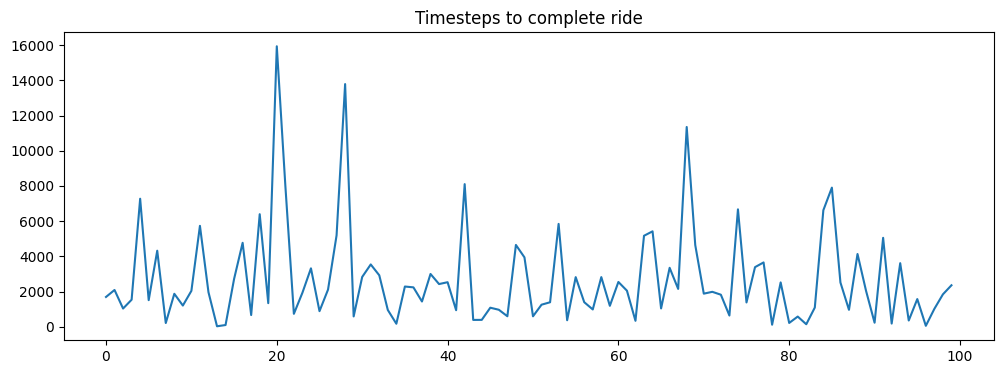

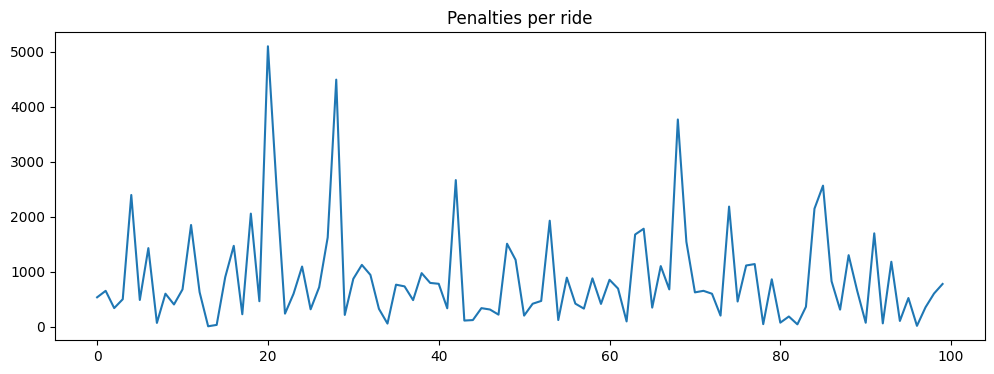

In [27]:
fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Timesteps to complete ride")    
pd.Series(timesteps_per_episode).plot(kind="line")
plt.show()

fig, ax = plt.subplots(figsize = (12, 4))
ax.set_title("Penalties per ride")    
pd.Series(penalties_per_episode).plot(kind="line")
plt.show()

In [28]:
print(f'Avg steps to complete ride: {np.array(timesteps_per_episode).mean()}')
print(f'Avg penalties to complete ride: {np.array(penalties_per_episode).mean()}')

Avg steps to complete ride: 2696.68
Avg penalties to complete ride: 875.95
